<a href="https://colab.research.google.com/github/Aquiles07/Actividades_Curso/blob/main/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [2]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  15.2M      0  0:00:01  0:00:01 --:--:-- 15.2M


In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [5]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

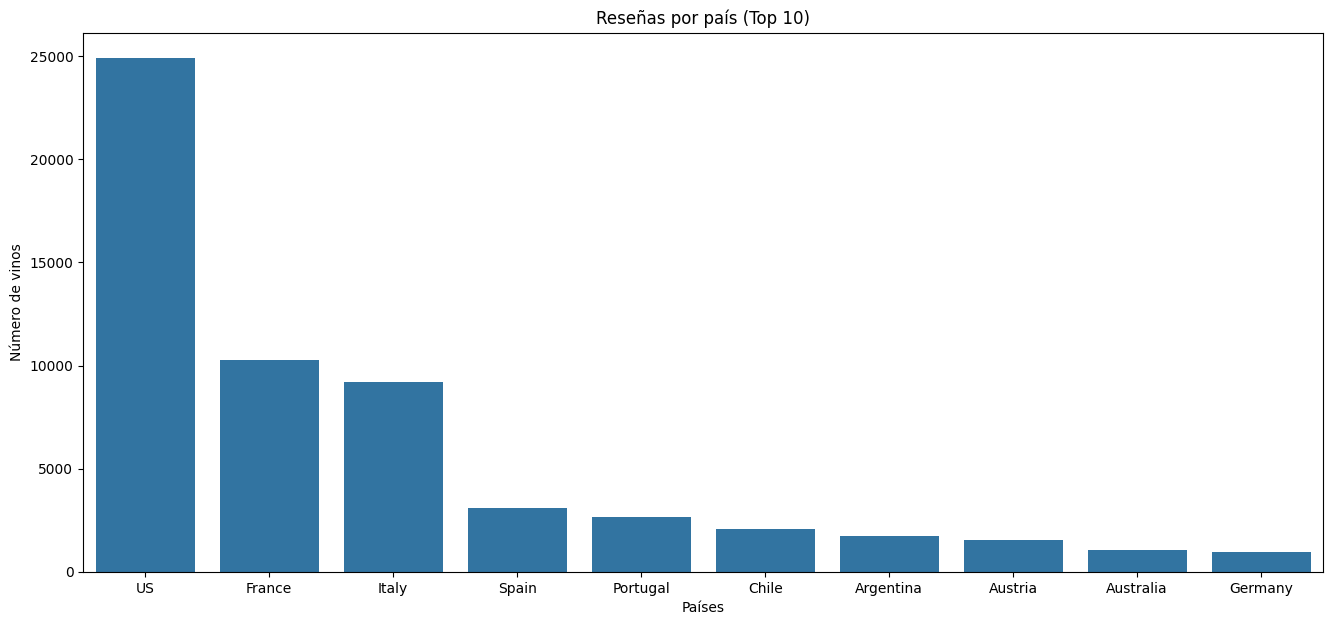

In [6]:
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index[:10]
y = conteos.values[:10]

plt.figure(figsize=(16,7))
sns.barplot(x=x[:10], y=y[:10])

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

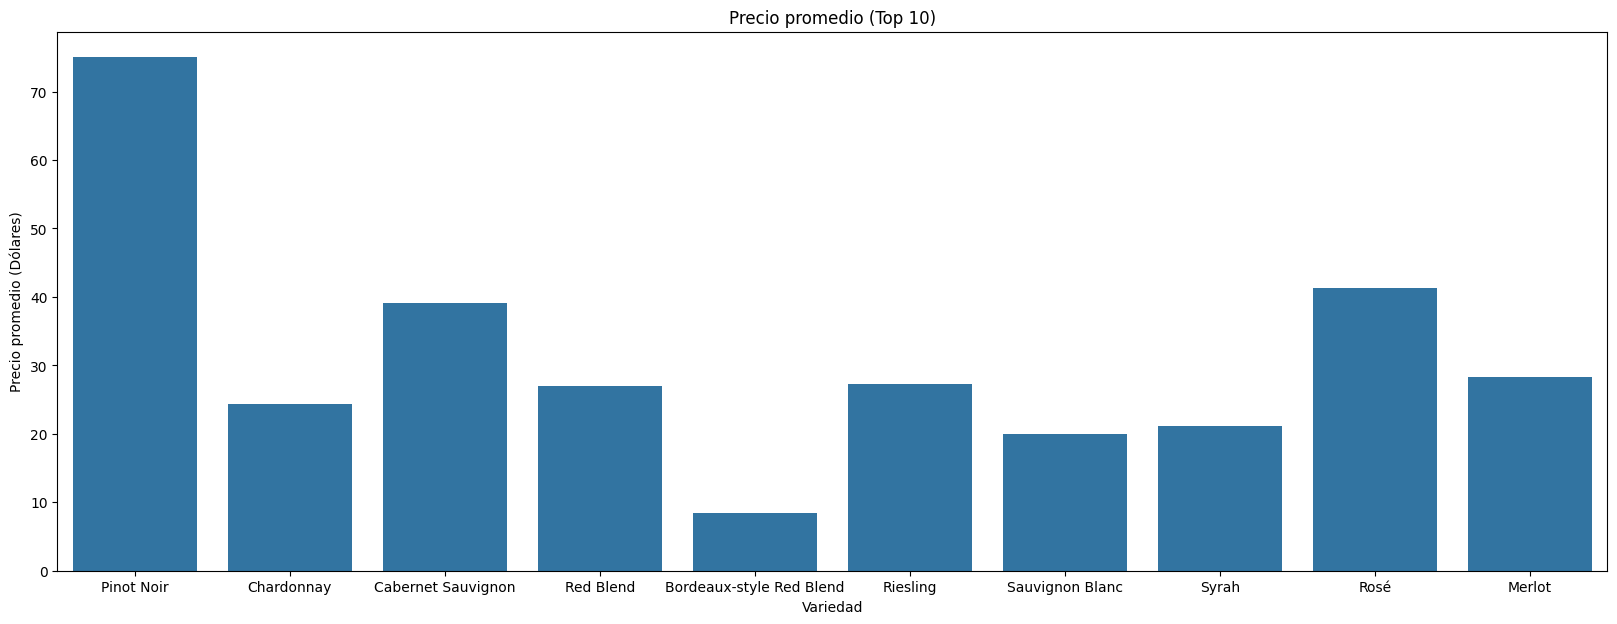

In [7]:
"""
SECUENCIA:
1.- Seleccionar las columna "price" y "variety"
2.-

"""
#promedios = df.["price"].df.groupby["variety"] #<COMPLETA>
promedios = df["price"].groupby(df["variety"]).mean()

conteos_variety=df.variety.value_counts()

x=conteos_variety.index
y=promedios.values

plt.figure(figsize=(20,7))

sns.barplot(x=x[:10], y=y[:10])

plt.xlabel("Variedad")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

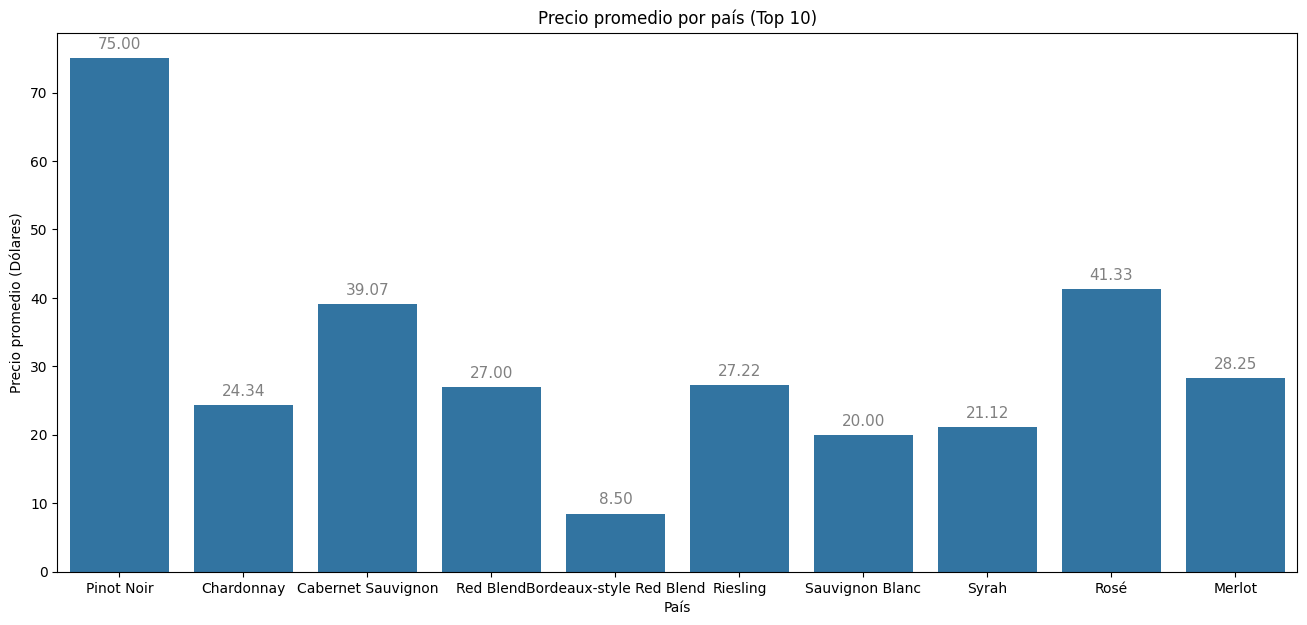

In [8]:
# Definimos el tamaño del canvas
plt.figure(figsize=(16, 7))

# La variable "ax" (axes) contiene la información del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), \
                (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha='center', va='center', fontsize=11, color='gray', \
                xytext=(0, 10), \
                textcoords='offset points')

# Rotulamos la gráfica y los ejes
plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio por país (Top 10)")

# Mostramos la gráfica
plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

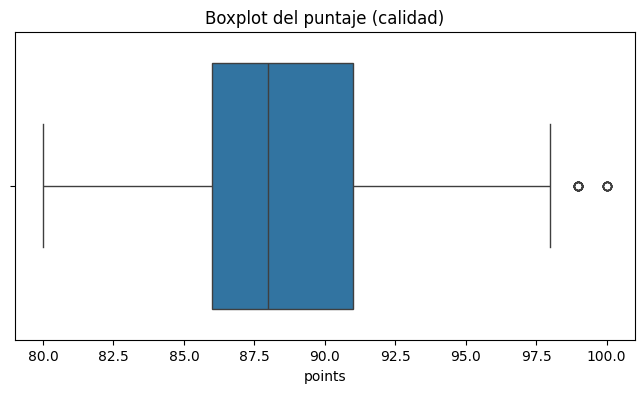

In [9]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

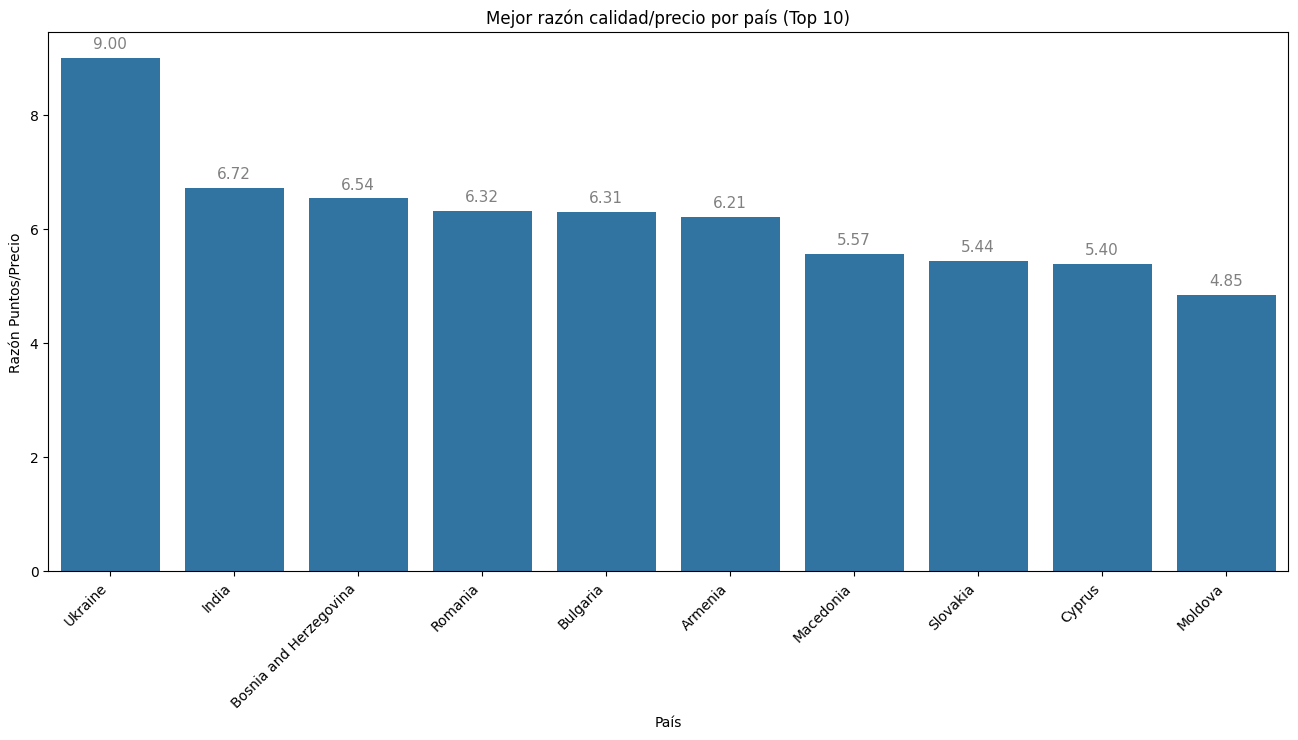

In [10]:
"""
SECUENCIA:

"""
plt.figure(figsize=(16,7))

### TU CODIGO AQUI ##

promedios = (df.groupby('country')['points'].mean() / df.groupby('country')['price'].mean()).nlargest(10)

# Crea el gráfico de barras
ax = sns.barplot(x=promedios.index, y=promedios.values)

#####################

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()

### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

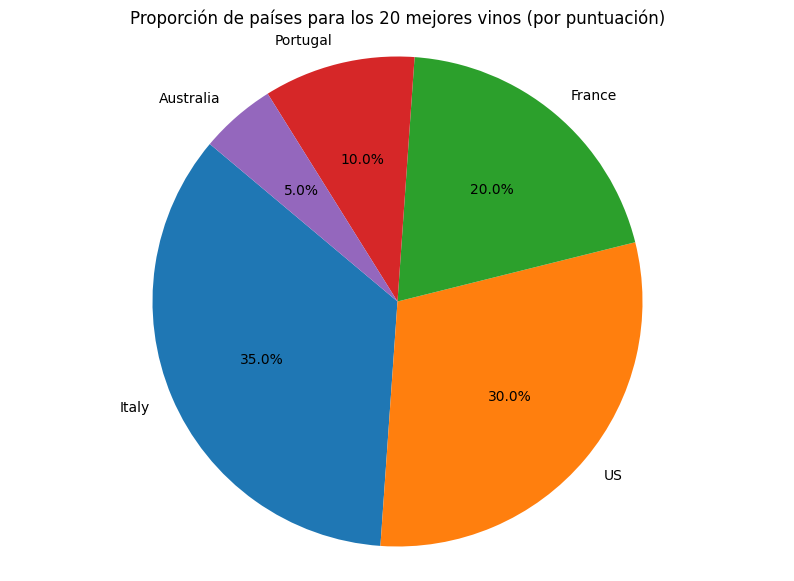

In [11]:
#TU CODIGO
# 1. Ordenar el DataFrame por la columna 'points' en orden descendente.
df_sorted = df.sort_values(by='points', ascending=False)

# 2. Seleccionar los primeros 20 registros.
top_20_wines = df_sorted.head(20)

# 3. Contar la cantidad de vinos por país en los 20 mejores vinos.
wine_count_by_country = top_20_wines['country'].value_counts()

# 4. Crear una gráfica de pastel para mostrar la proporción de países.
plt.figure(figsize=(10, 7))
plt.pie(wine_count_by_country, labels=wine_count_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de países para los 20 mejores vinos (por puntuación)')
plt.axis('equal')

plt.show()

### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [12]:
#TU CODIGO
proporciones = df['variety'].value_counts(normalize=True).head(10)
print(proporciones)

variety
Pinot Noir                  0.101608
Chardonnay                  0.089057
Cabernet Sauvignon          0.072556
Red Blend                   0.069656
Bordeaux-style Red Blend    0.052738
Riesling                    0.040103
Sauvignon Blanc             0.039070
Syrah                       0.031669
Rosé                        0.026502
Merlot                      0.023535
Name: proportion, dtype: float64


### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [13]:
#TU CODIGO
bodegas = df['winery'].value_counts(normalize=True).head(20)
print(bodegas)


winery
Georges Duboeuf               0.001817
Wines & Winemakers            0.001783
Testarossa                    0.001617
Louis Latour                  0.001450
Chateau Ste. Michelle         0.001433
Williams Selyem               0.001433
DFJ Vinhos                    0.001433
Concha y Toro                 0.001300
Gary Farrell                  0.001233
Lynmar                        0.001200
Kendall-Jackson               0.001133
Robert Mondavi                0.001083
Columbia Crest                0.000950
Trapiche                      0.000950
Undurraga                     0.000933
Siduri                        0.000917
Albert Bichot                 0.000917
Jean-Luc and Paul Aegerter    0.000883
Casa Santos Lima              0.000883
Rodney Strong                 0.000883
Name: proportion, dtype: float64


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [14]:
#TU CODIGO
# Filtrar el DataFrame original para incluir solo las 10 variedades de uva y las 20 bodegas más importantes
variedades_top_10 = df['variety'].value_counts().head(10).index
bodegas_top_20 = df['winery'].value_counts().head(20).index
p_v = df[df['variety'].isin(variedades_top_10) & df['winery'].isin(bodegas_top_20)]

# Seleccionar las columnas de interés y calcular la columna adicional de puntos/precio
p_v = p_v[['country', 'winery', 'variety', 'points', 'price']]
p_v['points/price'] = p_v['points'] / p_v['price']

# Cambiar el nombre de la bodega para que incluya su país de origen
p_v['winery'] = p_v['winery'] + ' (' + p_v['country'] + ')'

# Ordenar los datos por nombre de país, variedad y bodega (orden ascendente)
p_v = p_v.sort_values(by=['country', 'variety', 'winery'])

# Mostrar el nuevo DataFrame
print(p_v)


         country                winery             variety  points  price  \
2141   Argentina  Trapiche (Argentina)  Cabernet Sauvignon      84   10.0   
3056   Argentina  Trapiche (Argentina)  Cabernet Sauvignon      88   15.0   
15948  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      90   15.0   
24370  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      88   10.0   
30928  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      91   30.0   
...          ...                   ...                 ...     ...    ...   
235           US       Testarossa (US)               Syrah      85   49.0   
21415         US       Testarossa (US)               Syrah      91   54.0   
37366         US       Testarossa (US)               Syrah      94   54.0   
54756         US       Testarossa (US)               Syrah      94   54.0   
26489        NaN                   NaN     Sauvignon Blanc      87   12.0   

       points/price  
2141       8.400000  
3056       5.866667  
15948    

#### &#9758; Observa la relación puntos-precio por país

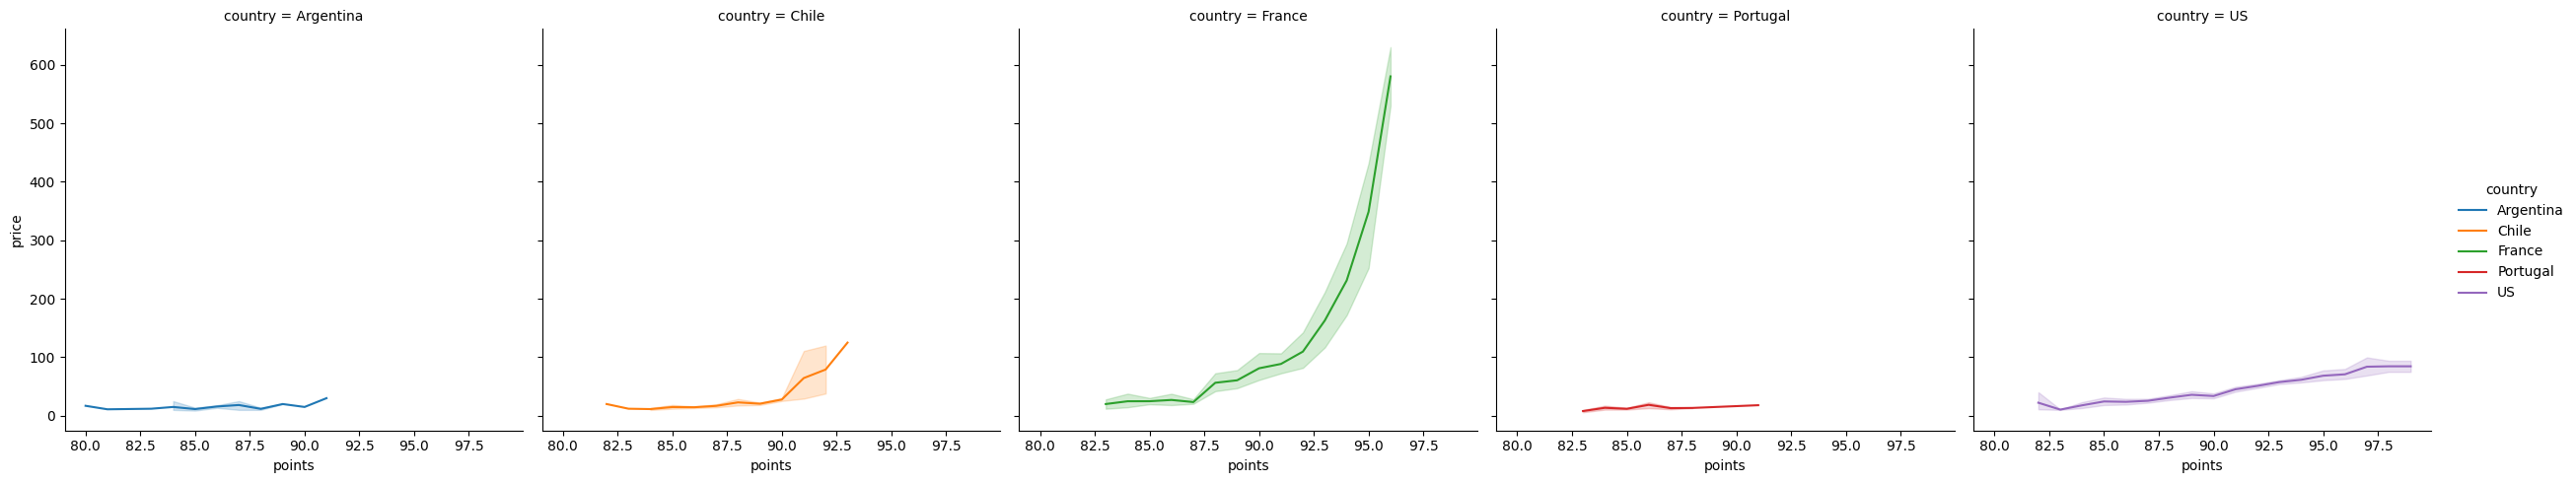

In [15]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

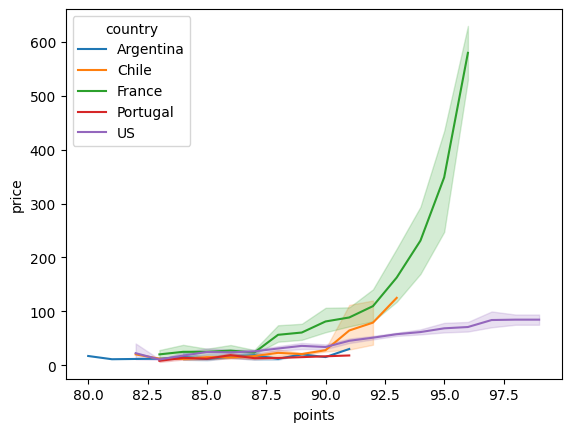

In [16]:
sns.lineplot(x="points", y="price", hue="country", data=p_v)

plt.show()

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

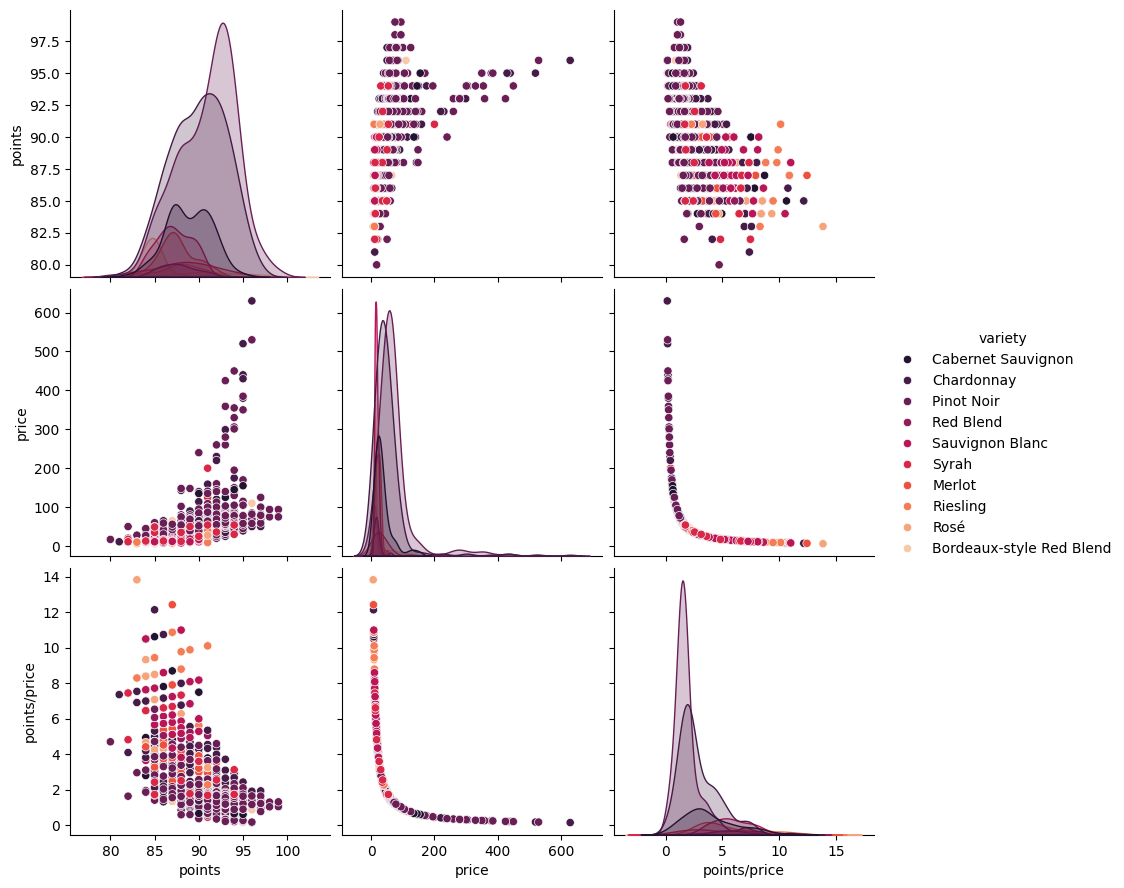

In [17]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

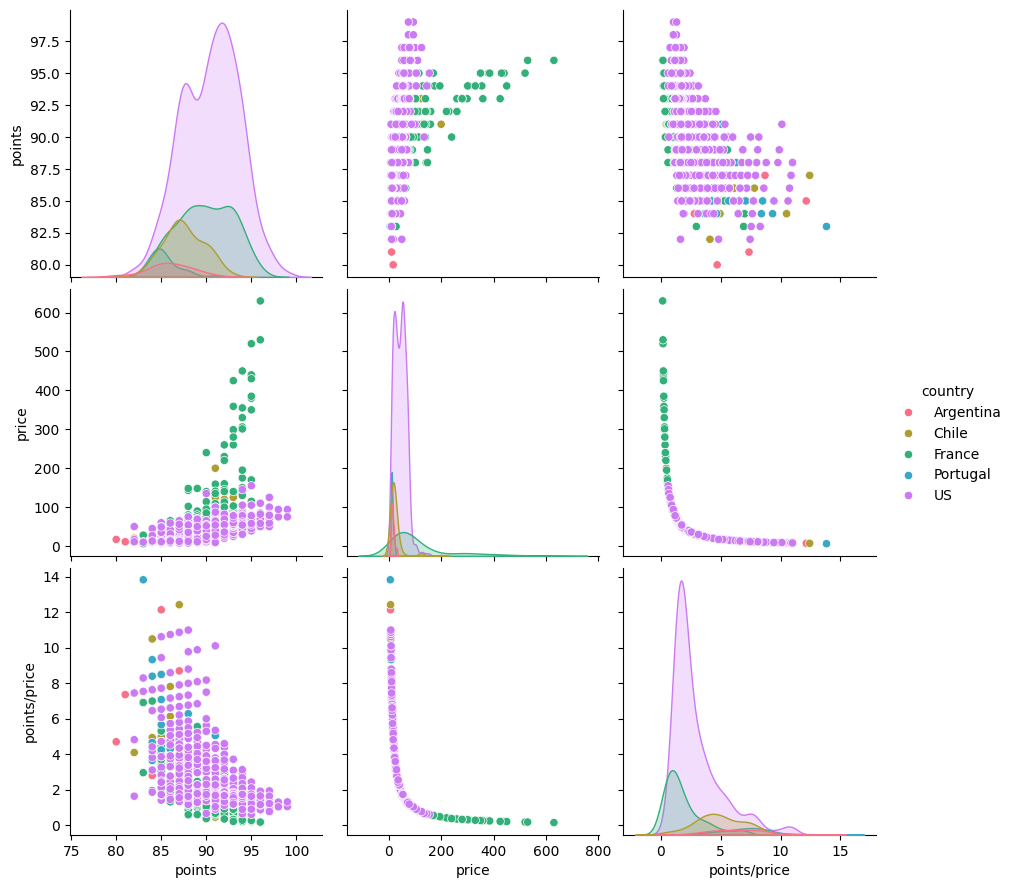

In [18]:
#TU CODIGO
sns.pairplot(p_v, hue="country", height=3, palette='husl')
plt.show()

#### &#9758; Observa las distribuciones por pares en función de la bodega.

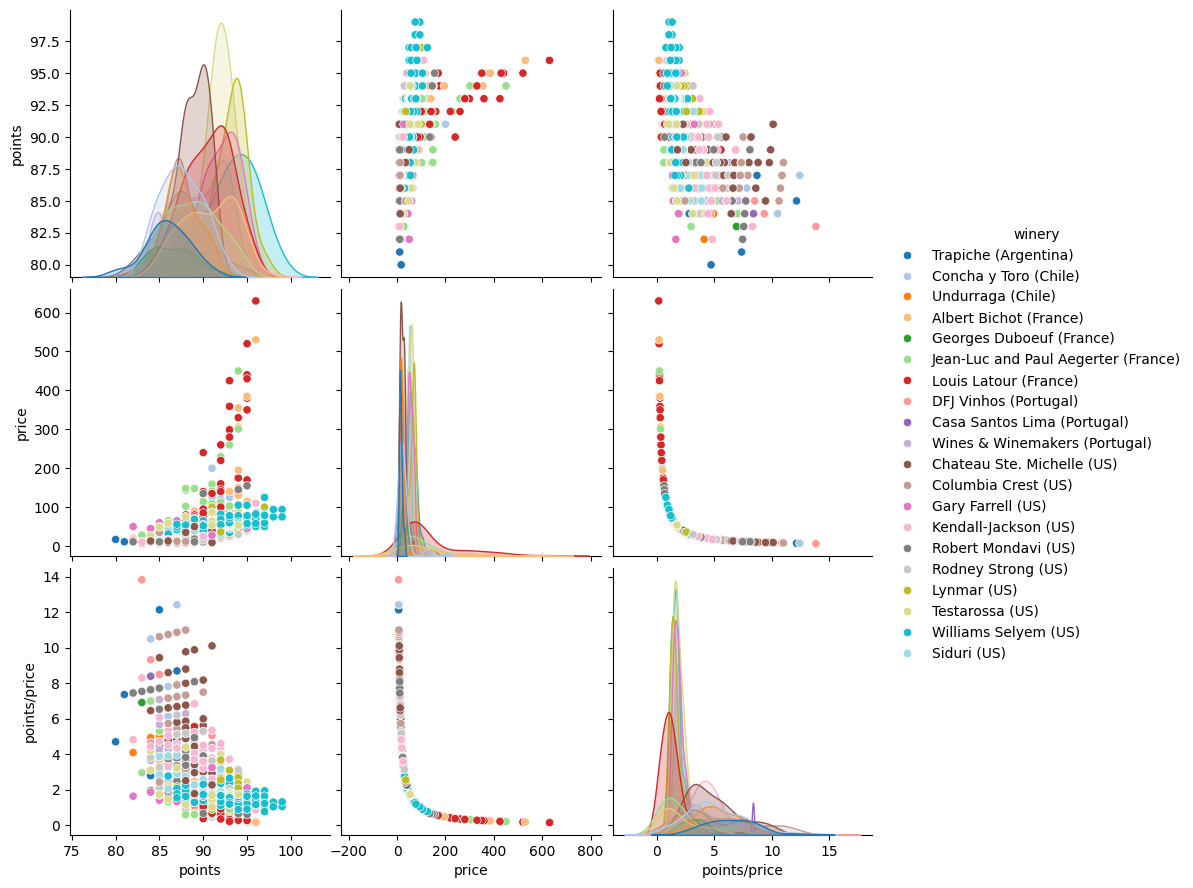

In [19]:
#TU CODIGO
sns.pairplot(p_v, hue="winery", height=3, palette='tab20')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

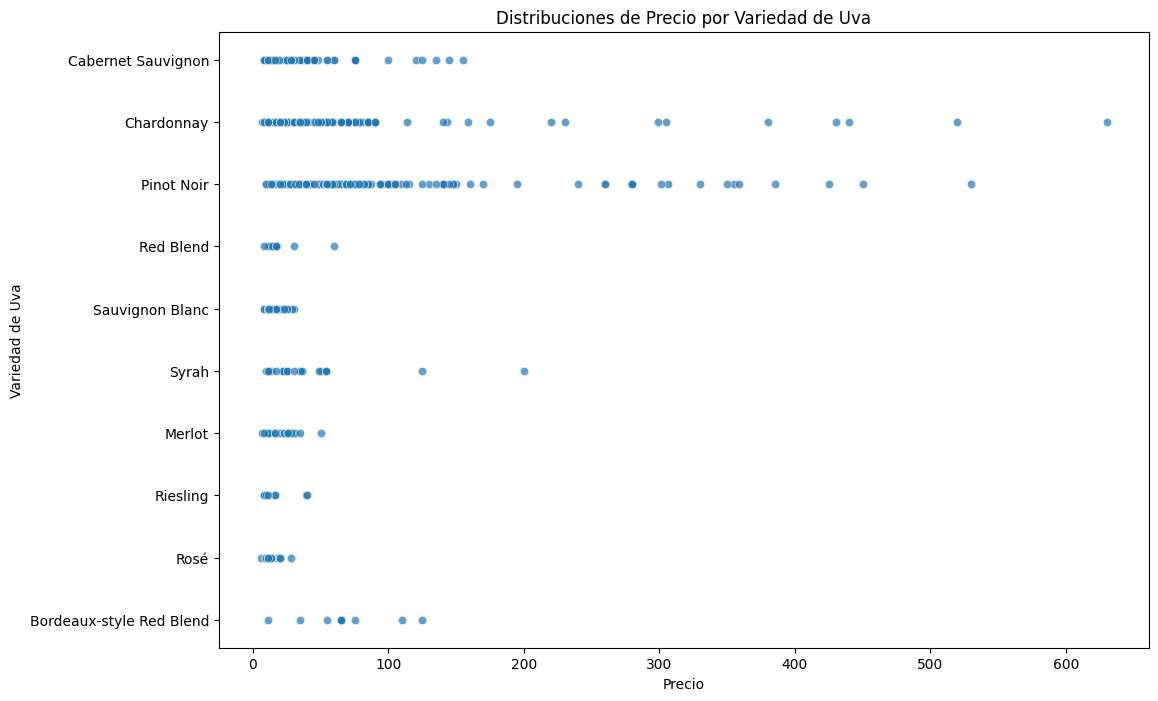

In [20]:
#TU CODIGO
plt.figure(figsize=(12, 8))
sns.scatterplot(x="price", y="variety", data=p_v, alpha=0.7)

# Rotular los ejes y el título
plt.xlabel("Precio")
plt.ylabel("Variedad de Uva")
plt.title("Distribuciones de Precio por Variedad de Uva")

# Mostrar el gráfico
plt.show()

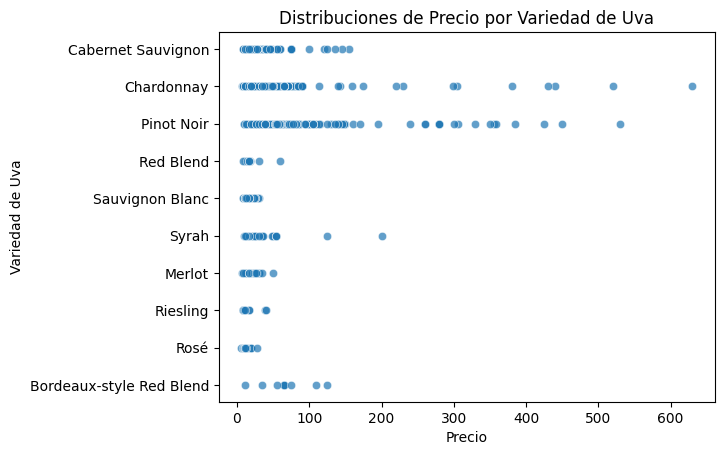

In [21]:
sns.scatterplot(x="price", y="variety", data=p_v, alpha=0.7)
plt.xlabel("Precio")
plt.ylabel("Variedad de Uva")
plt.title("Distribuciones de Precio por Variedad de Uva")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

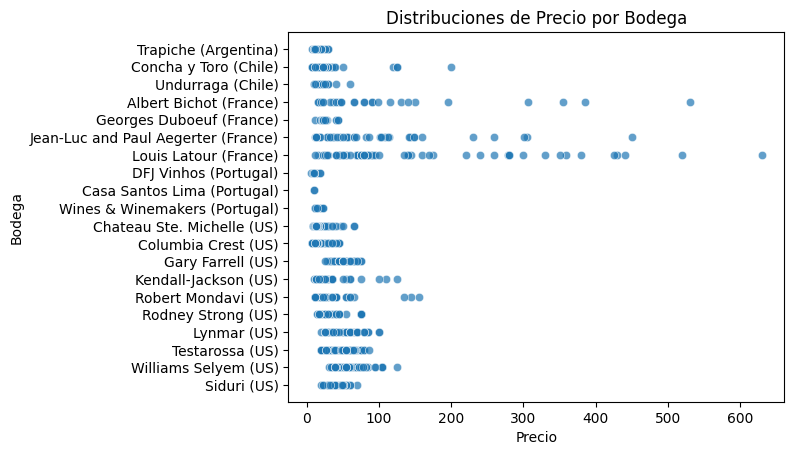

In [22]:
#TU CODIGO
sns.scatterplot(x="price", y="winery", data=p_v, alpha=0.7)
plt.xlabel("Precio")
plt.ylabel("Bodega")
plt.title("Distribuciones de Precio por Bodega")
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

<function matplotlib.pyplot.show(close=None, block=None)>

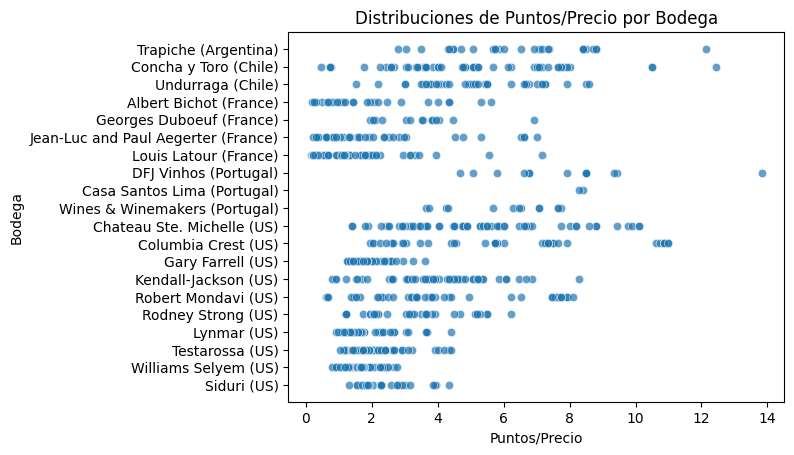

In [23]:
#TU CODIGO
sns.scatterplot(x="points/price", y="winery", data=p_v, alpha=0.7)
plt.xlabel("Puntos/Precio")
plt.ylabel("Bodega")
plt.title("Distribuciones de Puntos/Precio por Bodega")
plt.show

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

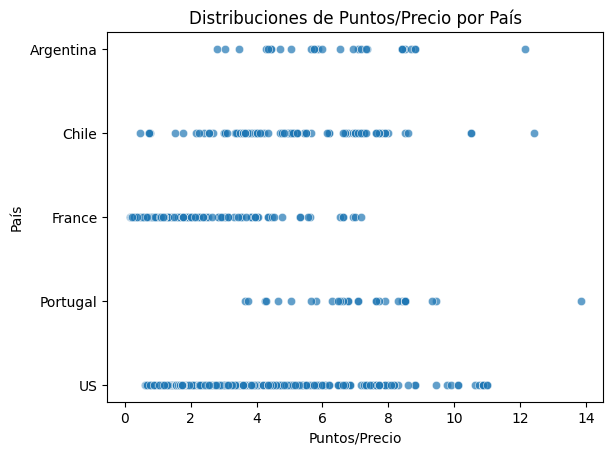

In [24]:
#TU CODIGO
sns.scatterplot(x="points/price", y="country", data=p_v, alpha=0.7)
plt.xlabel("Puntos/Precio")
plt.ylabel("País")
plt.title("Distribuciones de Puntos/Precio por País")
plt.show()

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [25]:
#TU CODIGO
# Eliminar la columna de descripción de p_v si existe
if 'description' in p_v.columns:
    p_v = p_v.drop(columns=['description'])

# Filtrar vinosMX para incluir solo las filas de México y eliminar la columna de descripción si existe
vinosMX_filtered = vinosMX[vinosMX['country'] == 'Mexico']
if 'description' in vinosMX_filtered.columns:
    vinosMX_filtered = vinosMX_filtered.drop(columns=['description'])

# Unir los DataFrames p_v y vinosMX_filtered utilizando el método append
df3 = pd.concat([p_v, vinosMX_filtered], ignore_index=True)

# Mostrar el DataFrame resultante
print(df3)

        country                winery                       variety  points  \
0     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      84   
1     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      88   
2     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      90   
3     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      88   
4     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      91   
...         ...                   ...                           ...     ...   
1024     Mexico        Viñas de Garza                     Red Blend      92   
1025     Mexico            L.A. Cetto                    Chardonnay      84   
1026     Mexico    Hacienda La Lomita  Sauvignon Blanc-Chenin Blanc      86   
1027     Mexico             La Lomita      Bordeaux-style Red Blend      88   
1028     Mexico           Monte Xanic     Cabernet Sauvignon-Merlot      86   

      price  points/price  
0      10.0      8.4000

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [26]:
# Filtrar los vinos de México en df3
vinos_mexicanos = df3[df3['country'] == 'Mexico'].copy()

# Calcular los valores de points/price para los vinos de México utilizando el método .loc
vinos_mexicanos.loc[:, 'points/price'] = vinos_mexicanos.apply(lambda row: row['points'] / row['price'], axis=1)

# Mostrar el DataFrame resultante
print(vinos_mexicanos)

     country                                 winery  \
999   Mexico                             L.A. Cetto   
1000  Mexico                            Monte Xanic   
1001  Mexico                             L.A. Cetto   
1002  Mexico                            Cava Aragon   
1003  Mexico                             L.A. Cetto   
1004  Mexico                     Hacienda La Lomita   
1005  Mexico                            Monte Xanic   
1006  Mexico                            Tres Valles   
1007  Mexico  Unión de Productores del Valle (UPVG)   
1008  Mexico                            Monte Xanic   
1009  Mexico                   Vinicola Fraternidad   
1010  Mexico                           Vinos Magbel   
1011  Mexico                                Möebius   
1012  Mexico                        Vinicola Urbana   
1013  Mexico                              Vena Cava   
1014  Mexico                            Monte Xanic   
1015  Mexico                         Viñas de Garza   
1016  Mexi

#### &#9758; Observa la relación puntos-precio por país

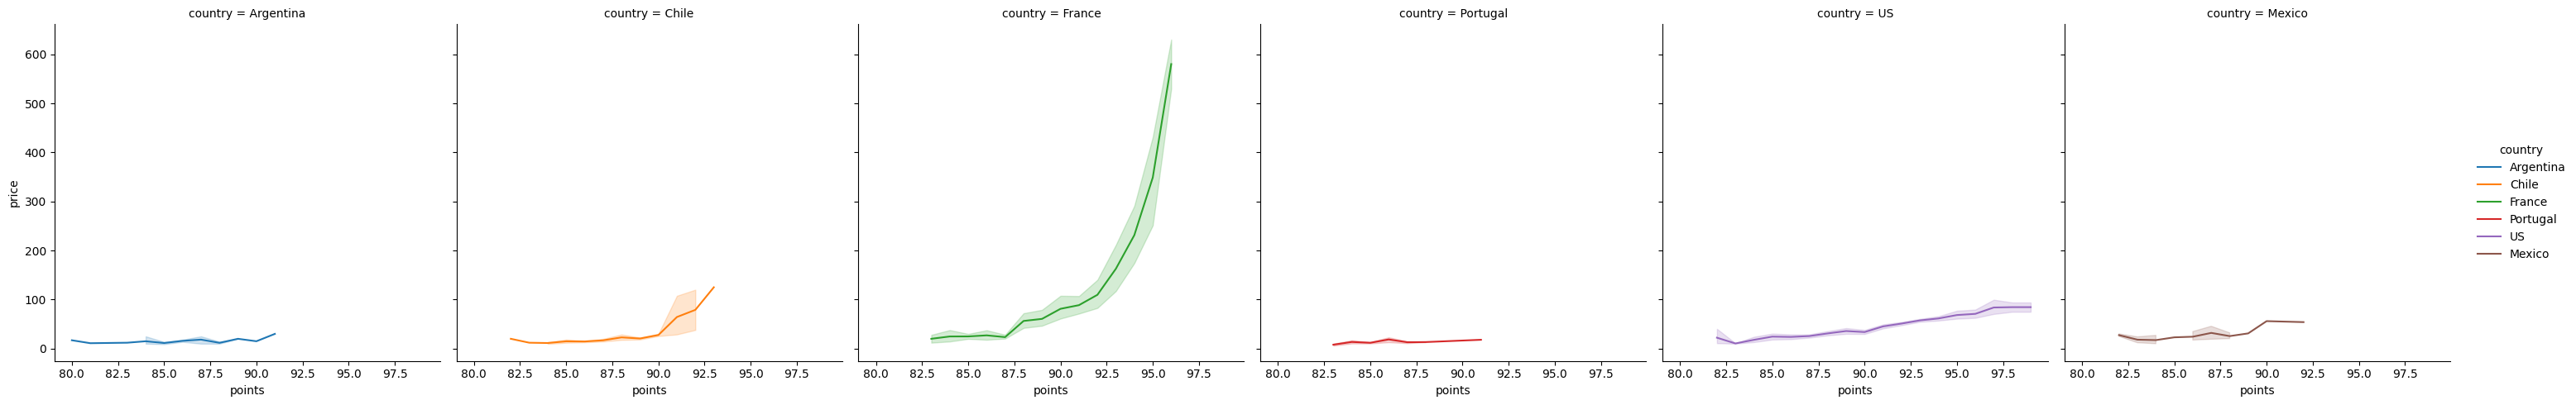

In [27]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

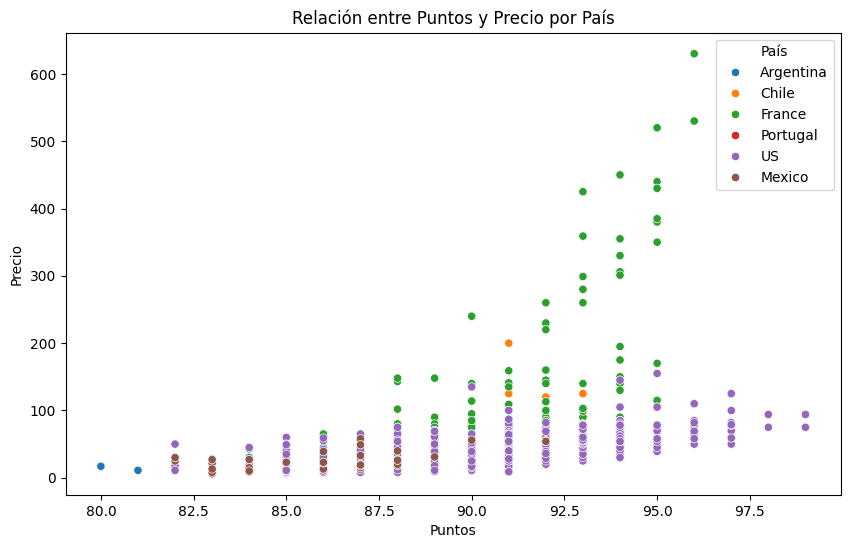

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="points", y="price", hue="country", data=df3)
plt.xlabel("Puntos")
plt.ylabel("Precio")
plt.title("Relación entre Puntos y Precio por País")
plt.legend(title="País")
plt.show()

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

        country                winery                       variety  points  \
0     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      84   
1     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      88   
2     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      90   
3     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      88   
4     Argentina  Trapiche (Argentina)            Cabernet Sauvignon      91   
...         ...                   ...                           ...     ...   
1024     Mexico        Viñas de Garza                     Red Blend      92   
1025     Mexico            L.A. Cetto                    Chardonnay      84   
1026     Mexico    Hacienda La Lomita  Sauvignon Blanc-Chenin Blanc      86   
1027     Mexico             La Lomita      Bordeaux-style Red Blend      88   
1028     Mexico           Monte Xanic     Cabernet Sauvignon-Merlot      86   

      price  points/price  
0      10.0      8.4000

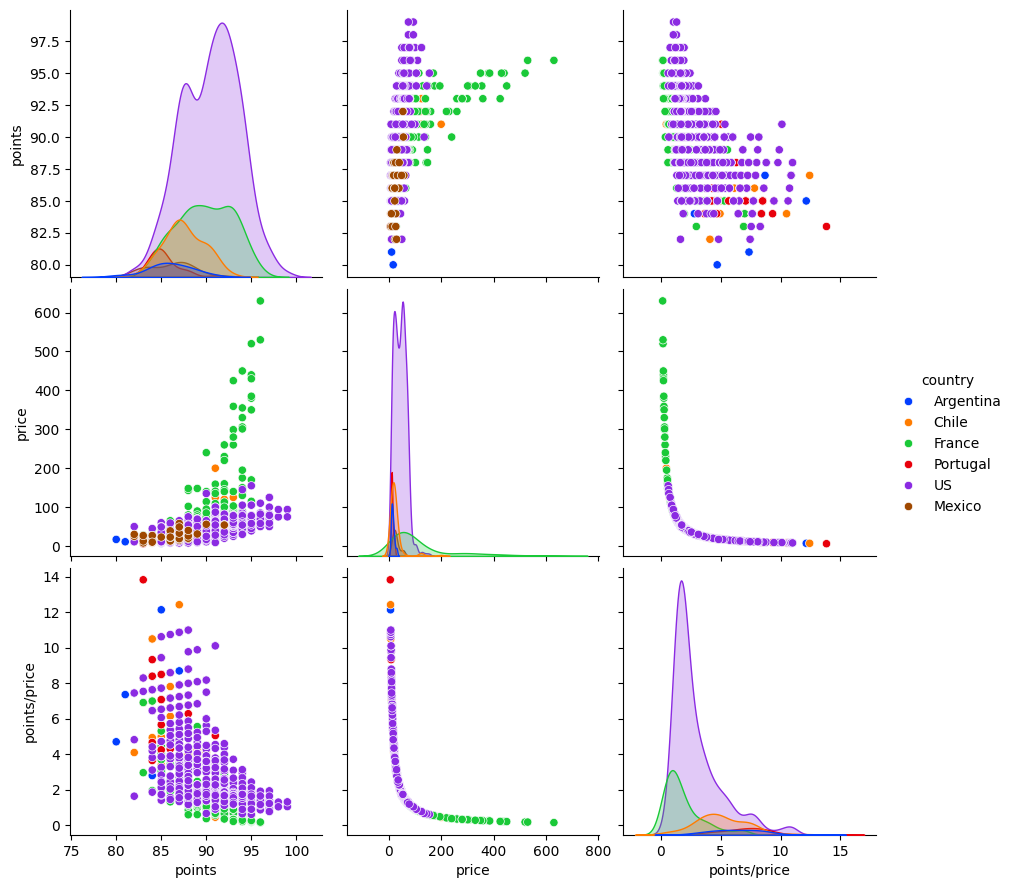

In [29]:
# Filtrar los datos de México en df3
mexico_data = df3[df3['country'] == 'Mexico']

# Filtrar los datos de otros países excluyendo México
other_data = df3[df3['country'] != 'Mexico']

# Concatenar los datos de otros países y los datos de México
mx_top = pd.concat([other_data, mexico_data])

# Visualizar la tabla mx_top
print(mx_top)

sns.pairplot(mx_top, hue="country", height=3, palette='bright')

#### &#9758; Observa las distribuciones (scatter) de puntos por país.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Chile'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'US'),
  Text(5, 0, 'Mexico')])

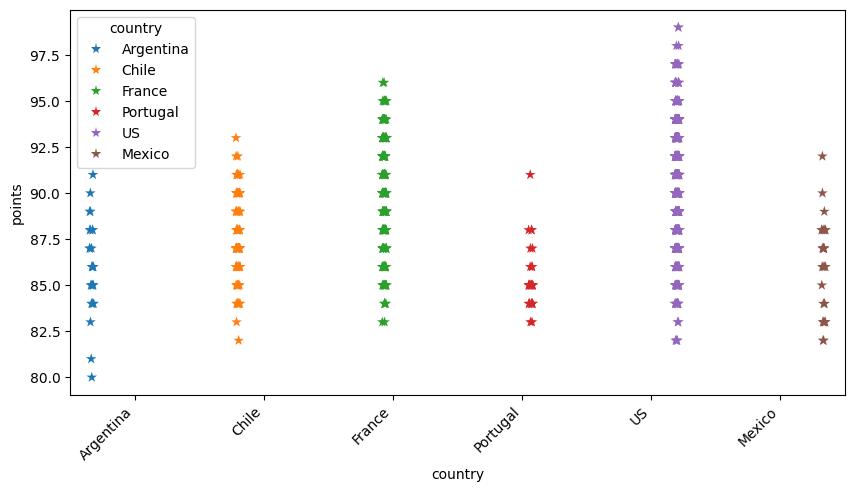

In [30]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3, dodge=True, hue="country", marker='*', size=8)
plt.xticks(rotation=45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Trapiche (Argentina)'),
  Text(1, 0, 'Concha y Toro (Chile)'),
  Text(2, 0, 'Undurraga (Chile)'),
  Text(3, 0, 'Albert Bichot (France)'),
  Text(4, 0, 'Georges Duboeuf (France)'),
  Text(5, 0, 'Jean-Luc and Paul Aegerter (France)'),
  Text(6, 0, 'Louis Latour (France)'),
  Text(7, 0, 'DFJ Vinhos (Portugal)'),
  Text(8, 0, 'Casa Santos Lima (Portugal)'),
  Text(9, 0, 'Wines & Winemakers (Portugal)'),
  Text(10, 0, 'Chateau Ste. Michelle (US)'),
  Text(11, 0, 'Columbia Crest (US)'),
  Text(12, 0, 'Gary Farrell (US)'),
  Text(13, 0, 'Kendall-Jackson (US)'),
  Text(14, 0, 'Robert Mondavi (US)'),
  Text(15, 0, 'Rodney Strong (US)'),
  Text(16, 0, 'Lynmar (US)'),
  Text(17, 0, 'Testarossa (US)'),
  Text(18, 0, 'Williams Selyem (US)'),
  Text(19, 0, 'Siduri (US)'),
  Text(20,

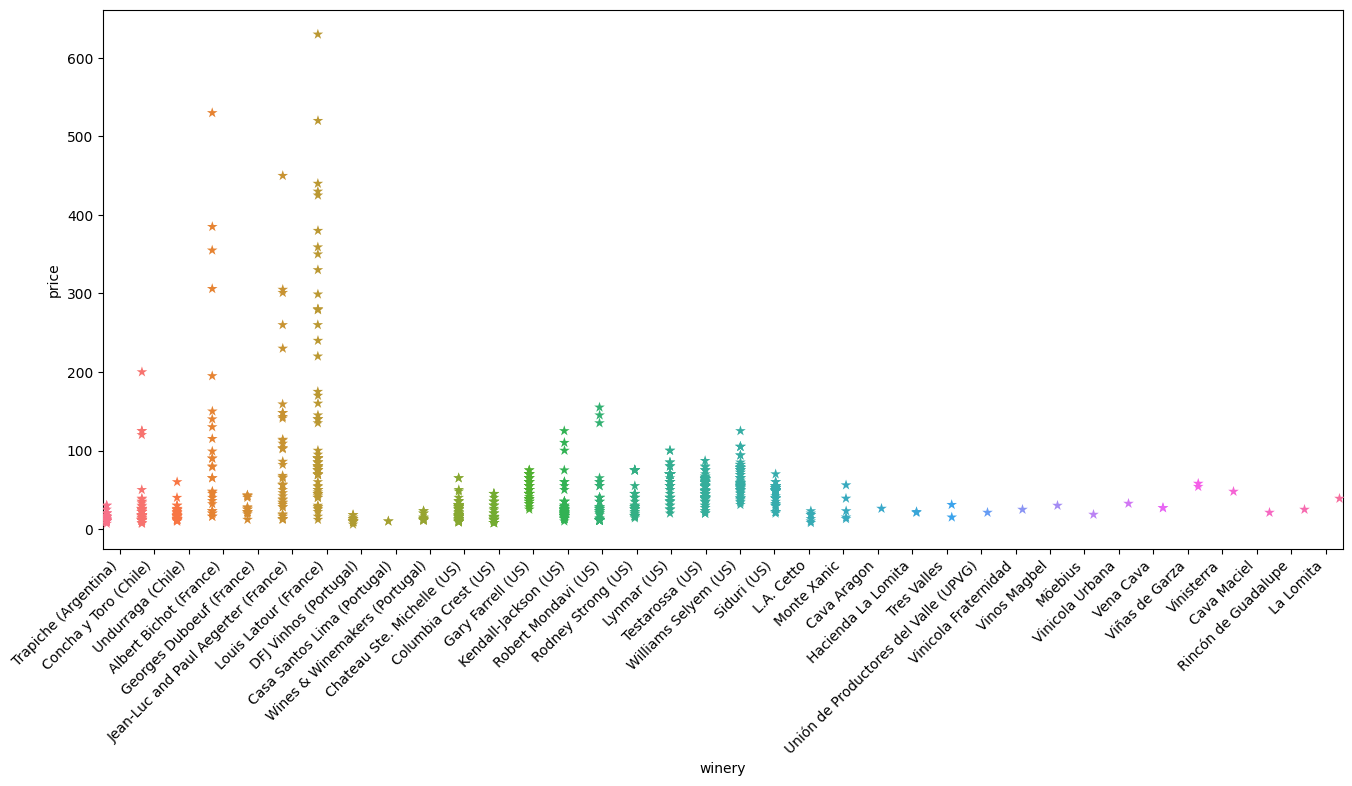

In [31]:
plt.figure(figsize=(16,7))
sns.stripplot(x="winery", y="price", hue="winery", data=df3, dodge=True, marker='*', size=8, legend=False)
plt.xticks(rotation=45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

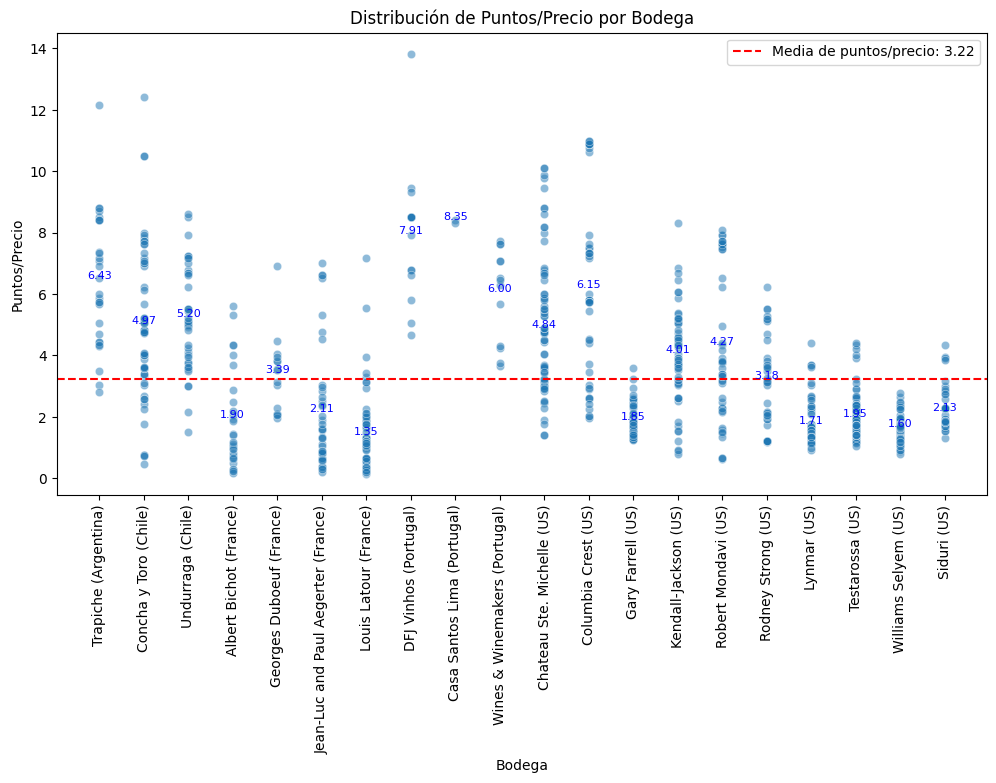

In [32]:
# Calcular los valores promedio de puntos/precio por bodega
medias = df3.groupby(['country', 'winery'])['points/price'].mean().reset_index()

# Filtrar los valores finitos para evitar el problema de posición no finita
medias = medias[np.isfinite(medias['points/price'])]

# Dibujar el gráfico de dispersión de puntos/precio por bodega
plt.figure(figsize=(12, 6))
sns.scatterplot(x="winery", y="points/price", data=df3, alpha=0.5)

# Dibujar una línea horizontal que marque el promedio de todos los datos
mean_points_price = df3['points/price'].mean()
plt.axhline(y=mean_points_price, color='r', linestyle='--', label=f'Media de puntos/precio: {mean_points_price:.2f}')

# Dibujar marcas para indicar los valores promedio por cada bodega
for i, row in medias.iterrows():
    plt.text(row['winery'], row['points/price'], f"{row['points/price']:.2f}", ha='center', va='bottom', fontsize=8, color='blue')

plt.xticks(rotation=90)
plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')
plt.title('Distribución de Puntos/Precio por Bodega')
plt.legend()
plt.show()

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

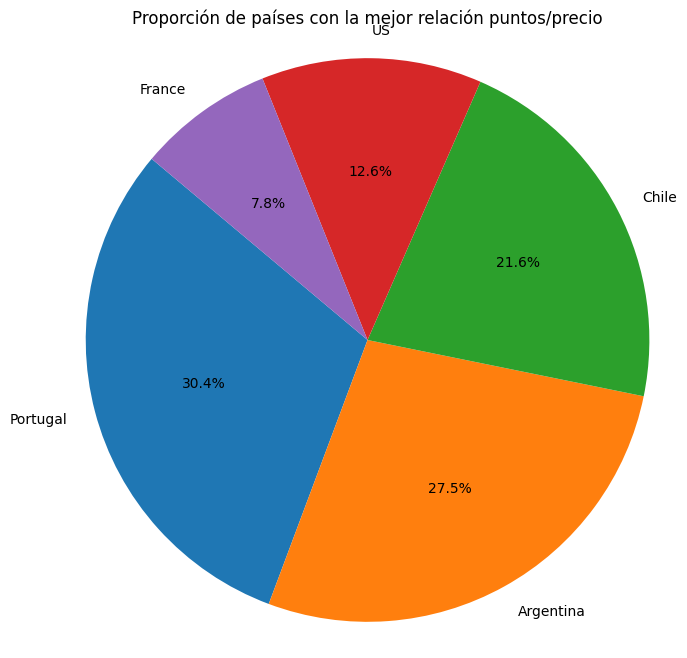

In [33]:
# Calcular la media de la relación puntos/precio por país
mean_points_price_by_country = df3.groupby('country')['points/price'].mean().reset_index()

# Ordenar los países por su relación puntos/precio de mayor a menor
mean_points_price_by_country = mean_points_price_by_country.sort_values(by='points/price', ascending=False)

# Tomar los 5 primeros países con la mejor relación puntos/precio
top_countries = mean_points_price_by_country.head(5)

# Calcular la proporción de cada país respecto al total de los 5 mejores países
proportions = top_countries.set_index('country')['points/price'] / top_countries['points/price'].sum()

# Comprobar si hay valores NaN en la serie proportions
if proportions.isnull().any():
    # Eliminar los valores NaN
    proportions = proportions.dropna()

# Graficar el resultado en un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de países con la mejor relación puntos/precio')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()